## Train Model

Using cpu for training


Epochs:  10%|█         | 1/10 [01:56<17:31, 116.84s/it]

Epoch 1/10
Training Loss: 1844.124 - MSE: 1844.0699462890625
Validation Loss: 0.144 - MSE: 0.14399999380111694


Epochs:  20%|██        | 2/10 [03:45<14:58, 112.31s/it]

Epoch 2/10
Training Loss: 0.139 - MSE: 0.13899999856948853
Validation Loss: 0.137 - MSE: 0.13699999451637268


Epochs:  30%|███       | 3/10 [05:37<13:02, 111.82s/it]

Epoch 3/10
Training Loss: 0.131 - MSE: 0.13099999725818634
Validation Loss: 0.126 - MSE: 0.12600000202655792


Epochs:  40%|████      | 4/10 [07:25<11:02, 110.47s/it]

Epoch 4/10
Training Loss: 0.109 - MSE: 0.10899999737739563
Validation Loss: 0.103 - MSE: 0.10300000011920929


Epochs:  50%|█████     | 5/10 [09:13<09:07, 109.43s/it]

Epoch 5/10
Training Loss: 0.083 - MSE: 0.08299999684095383
Validation Loss: 0.097 - MSE: 0.09700000286102295


Epochs:  60%|██████    | 6/10 [11:05<07:21, 110.30s/it]

Epoch 6/10
Training Loss: 0.072 - MSE: 0.07199999690055847
Validation Loss: 0.094 - MSE: 0.09399999678134918


Epochs:  70%|███████   | 7/10 [12:52<05:28, 109.38s/it]

Epoch 7/10
Training Loss: 0.065 - MSE: 0.06499999761581421
Validation Loss: 0.094 - MSE: 0.09399999678134918


Epochs:  80%|████████  | 8/10 [14:47<03:42, 111.08s/it]

Epoch 8/10
Training Loss: 0.059 - MSE: 0.05900000035762787
Validation Loss: 0.095 - MSE: 0.0949999988079071


Epochs:  90%|█████████ | 9/10 [16:42<01:52, 112.29s/it]

Epoch 9/10
Training Loss: 0.054 - MSE: 0.05400000140070915
Validation Loss: 0.094 - MSE: 0.09399999678134918


Epochs: 100%|██████████| 10/10 [18:37<00:00, 111.70s/it]

Epoch 10/10
Training Loss: 0.053 - MSE: 0.05299999937415123
Validation Loss: 0.094 - MSE: 0.09399999678134918


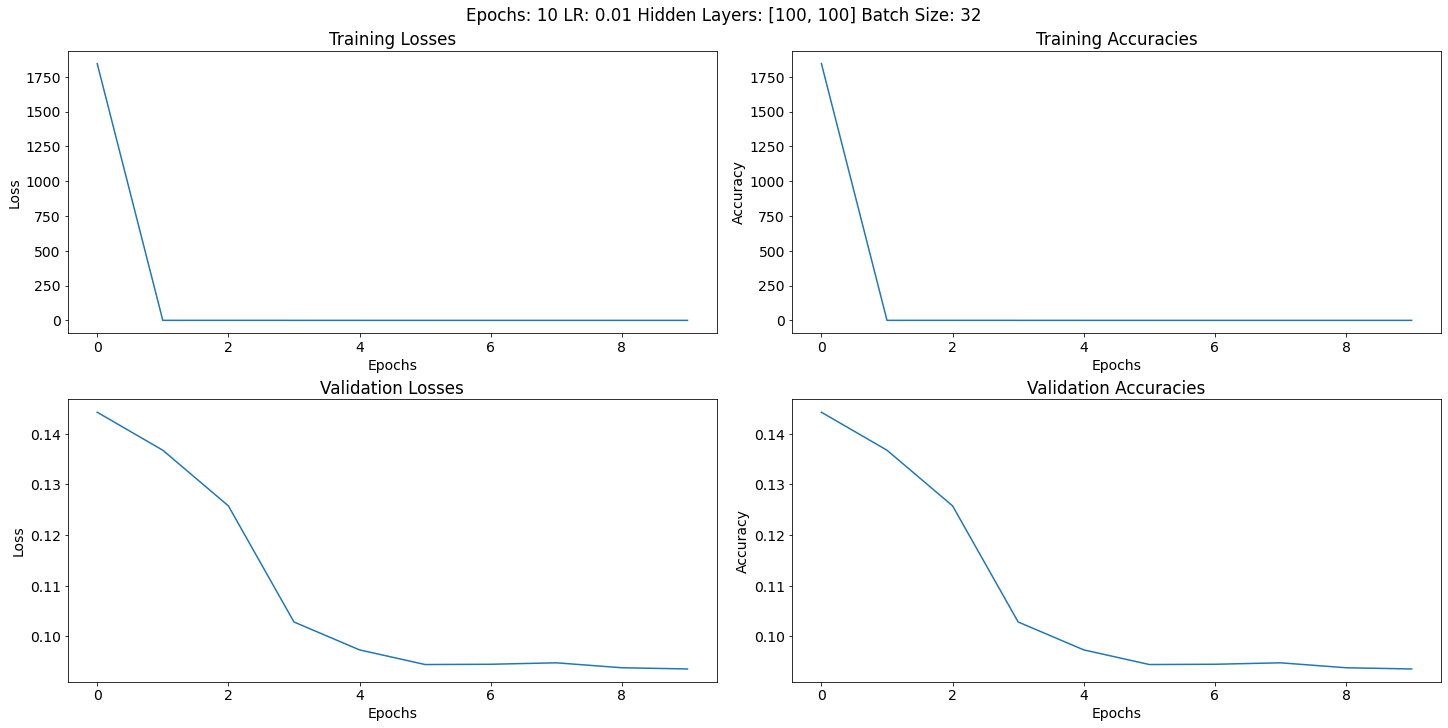

In [1]:
import pandas as pd

from cnn import cnn_train

# used MSE both times instead of MAE for more intuitive values, whoopsie 
cnn, (train_loss, val_loss), (train_acc, val_acc) = cnn_train(out_channels= [100, 100], epochs=10, 
                                                              batch_size=32, learning_rate=0.01, cuda=False, 
                                                              plot=True, verbose=True)

## Save Model

In [2]:
import utils

utils.save_model(cnn)

Model saved to Models/cnn_model.pth


## Call API

manually start the API by:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;uvicorn API:app --reload 
or start docker container:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;docker run -p 8000:8000 visibility-detector

In [3]:
import requests
import utils
import pandas as pd

filenames = utils.get_random_filenames(utils.config["img_path"],  num_files=10)

for filename in filenames:

    csv = pd.read_csv(utils.config["csv_path"])
    target_values = [csv[csv["filename"] == filename]["perspective_score_hood"].item(), csv[csv["filename"] == filename]["perspective_score_backdoor_left"].item()]
    
    # Path to the image file you want to send
    image_path = utils.config["img_path"] + filename
    
    # Open the image file in binary mode
    
    with open(image_path, 'rb') as f:
        # Use the `files` argument to send the file in the request
        file = {'file': f}
    
        # Send the POST request to the FastAPI server
        res = requests.post(url='http://127.0.0.1:8000/predict/', files=file)
        
        predictions_hood = res.json()["perspective_score_hood"]
        predictions_backdoor_left = res.json()["perspective_score_backdoor_left"]
    
        # Print the response from the API
        print(f"Prediction Hood: {predictions_hood} - Targets: {target_values[0]}\n"
              f"Prediction Backdoor left: {predictions_hood} - Targets: {target_values[1]}")


Prediction Hood: -0.22415605187416077 - Targets: 0.0
Prediction Backdoor left: -0.22415605187416077 - Targets: 0.0
Prediction Hood: 0.3247177302837372 - Targets: 0.0
Prediction Backdoor left: 0.3247177302837372 - Targets: 0.9020861
Prediction Hood: 0.8619610071182251 - Targets: 0.90295714
Prediction Backdoor left: 0.8619610071182251 - Targets: 0.68050206
Prediction Hood: 0.04003313183784485 - Targets: 0.0
Prediction Backdoor left: 0.04003313183784485 - Targets: 0.30936742
Prediction Hood: 0.6604833602905273 - Targets: 0.76480025
Prediction Backdoor left: 0.6604833602905273 - Targets: 0.46376657
Prediction Hood: -0.03908458352088928 - Targets: 0.0
Prediction Backdoor left: -0.03908458352088928 - Targets: 0.0
Prediction Hood: 0.1487956941127777 - Targets: 0.64818823
Prediction Backdoor left: 0.1487956941127777 - Targets: 0.0
Prediction Hood: 0.026867106556892395 - Targets: 0.0
Prediction Backdoor left: 0.026867106556892395 - Targets: 0.0
Prediction Hood: 0.12165427207946777 - Targets: 0.